In [1]:
library(ggplot2)
library(reshape)

In [2]:
sum1 <- function(m) {
    res = 0
    
    for(i in 1:dim(m)[1]) {
        for(j in 1:dim(m)[2]) {
            res <- res + m[i,j]
        }
    }

    return(res)
}


In [3]:
sum2 <- function(m) {
    res = .C("sum2"
             ,mtrx=as.double(m)
             ,m=as.integer(dim(m)[1])
             ,n=as.integer(dim(m)[2])
             ,res=as.double(0)
            )

    return(res$res)
}

In [4]:
dyn.load("sum2.so")

In [7]:
msizes = c()
times_1 = c()
times_2 = c()

for(i in (1:100) * 10) {
    m <- matrix(rnorm(i^2), i)
    
    times_1 = append(times_1, summary(system.time(sum1(m)))[1])
    times_2 = append(times_2, summary(system.time(sum2(m)))[1])
    msizes = append(msizes, i)
}

df = data.frame(size=msizes, sum_R = times_1, sum_c = times_2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



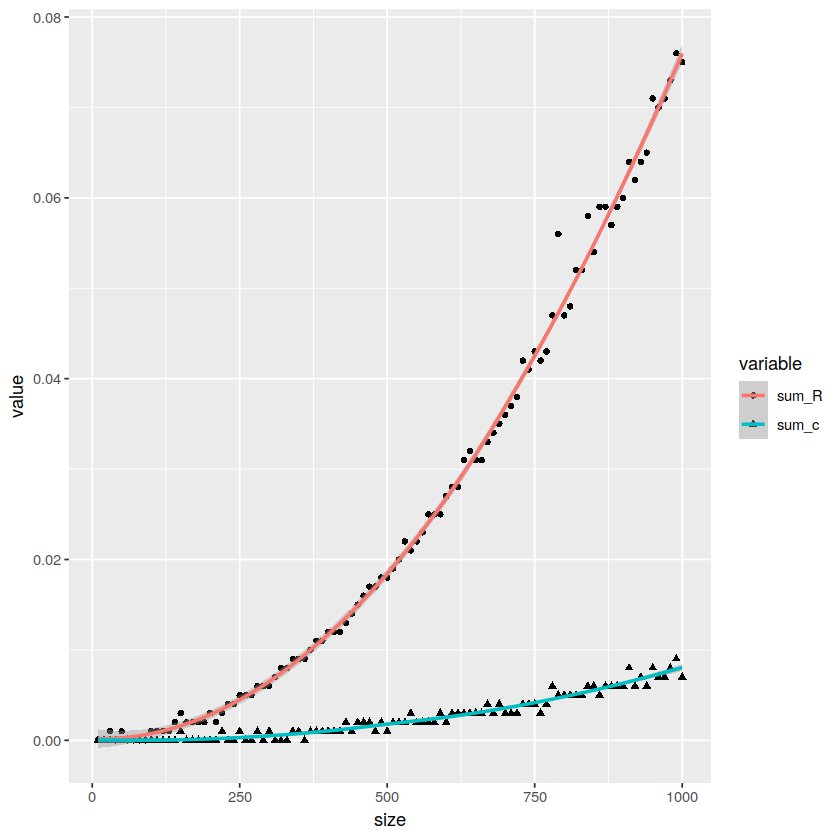

In [8]:
ggplot(data=melt(df, id.vars="size"), aes(x=size, y=value)) +
geom_point(aes(shape=variable)) + geom_smooth(aes(color=variable))